In [120]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

##Analisis de precio de venta de propiedades en la ciudad de Perth - Australia

In [122]:
#Se lee el archivo de datos
datos = '/content/drive/MyDrive/Colab Python/03. Análisis Exploratorio y Estadística/Casos de Uso/PerthData.csv'
#Se crea un dataframe con los datos
perthdf = pd.read_csv(datos)
#Se visualizan los datos
perthdf.head(5)

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,09-2018\r,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.193470,115.859553,ATWELL COLLEGE,5.524324,129.0
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,07-2018\r,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,11-2016\r,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,NaN


In [123]:
#Un resumen de los datos del dataframe
perthdf.describe(include='all')

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
count,33656,33656,3.365600e+04,33656.000000,33656.000000,31178.000000,33656.000000,33656.000000,30501.000000,33656.000000,33656,33656.000000,33656,33656.000000,33656.000000,33656.000000,33656,33656.000000,22704.000000
unique,33566,321,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68,NaN,350,NaN,NaN,NaN,160,NaN,NaN
top,123 Fairway,Bertram,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Midland Station,NaN,10-2020\r,NaN,NaN,NaN,SWAN VIEW SENIOR HIGH SCHOOL,NaN,NaN
freq,3,231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4141,NaN,628,NaN,NaN,NaN,895,NaN,NaN
mean,NaN,NaN,6.370720e+05,3.659110,1.823063,2.199917,2740.644016,183.501545,1989.706436,19777.374465,NaN,4523.371494,NaN,6089.420074,-31.960664,115.879265,NaN,1.815268,72.672569
std,NaN,NaN,3.558256e+05,0.752038,0.587427,1.365225,16693.513215,72.102982,20.964330,11364.415413,NaN,4495.064024,NaN,62.167921,0.177780,0.118137,NaN,1.746000,40.639795
min,NaN,NaN,5.100000e+04,1.000000,1.000000,1.000000,61.000000,1.000000,1868.000000,681.000000,NaN,46.000000,NaN,6003.000000,-32.472979,115.582730,NaN,0.070912,1.000000
25%,NaN,NaN,4.100000e+05,3.000000,1.000000,2.000000,503.000000,130.000000,1978.000000,11200.000000,NaN,1800.000000,NaN,6050.000000,-32.068437,115.789763,NaN,0.880568,39.000000
50%,NaN,NaN,5.355000e+05,4.000000,2.000000,2.000000,682.000000,172.000000,1995.000000,17500.000000,NaN,3200.000000,NaN,6069.000000,-31.933231,115.854198,NaN,1.345520,68.000000
75%,NaN,NaN,7.600000e+05,4.000000,2.000000,2.000000,838.000000,222.250000,2005.000000,26600.000000,NaN,5300.000000,NaN,6150.000000,-31.843818,115.970722,NaN,2.097225,105.000000


In [124]:
#Se revisan cuantos datos nulos aparecen por cada columna
perthdf.isna().sum()

ADDRESS                 0
SUBURB                  0
PRICE                   0
BEDROOMS                0
BATHROOMS               0
GARAGE               2478
LAND_AREA               0
FLOOR_AREA              0
BUILD_YEAR           3155
CBD_DIST                0
NEAREST_STN             0
NEAREST_STN_DIST        0
DATE_SOLD               0
POSTCODE                0
LATITUDE                0
LONGITUDE               0
NEAREST_SCH             0
NEAREST_SCH_DIST        0
NEAREST_SCH_RANK    10952
dtype: int64

In [125]:
#Se eliminaran las filas que presentan datos nulos en el atributo BUILD_YEAR, ya que no es posible recuperar esa información, además representan aproximadamente el 10% de la poblacion.
perthdf = perthdf.dropna(subset=['BUILD_YEAR'])
#Se asume que los registros nulos en el atributo Garage no tendrán estacionamiento disponible, por lo que se llenará esa columna con valores 0
perthdf['GARAGE'] = perthdf['GARAGE'].fillna(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [126]:
#Se eliminan los caracteres "\r" del campo DATE_SOLD
perthdf['DATE_SOLD'] = perthdf['DATE_SOLD'].replace(to_replace="\r",value="",regex=True)
#Se crean dos nuevas columnas a partir de la columna DATE_SOLD, para representar el mes y el año de venta
perthdf['MONTH_SOLD'] = pd.to_numeric(perthdf['DATE_SOLD'].str[:2])
perthdf['YEAR_SOLD'] = pd.to_numeric(perthdf['DATE_SOLD'].str[-4:])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [127]:
#Se muestra una estadística de la cantidad de registros que existen en el dataframe por número de habitaciones
perthdf.groupby('BEDROOMS')['BEDROOMS'].value_counts()

BEDROOMS  BEDROOMS
1         1              79
2         2            1317
3         3           10560
4         4           15954
5         5            2257
6         6             265
7         7              47
8         8              17
9         9               3
10        10              2
Name: BEDROOMS, dtype: int64

In [128]:
perthdf.head()

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK,MONTH_SOLD,YEAR_SOLD
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,09-2018,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN,9,2018
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019,6167,-32.193470,115.859553,ATWELL COLLEGE,5.524324,129.0,2,2019
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0,6,2015
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,07-2018,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN,7,2018
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,11-2016,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,NaN,11,2016


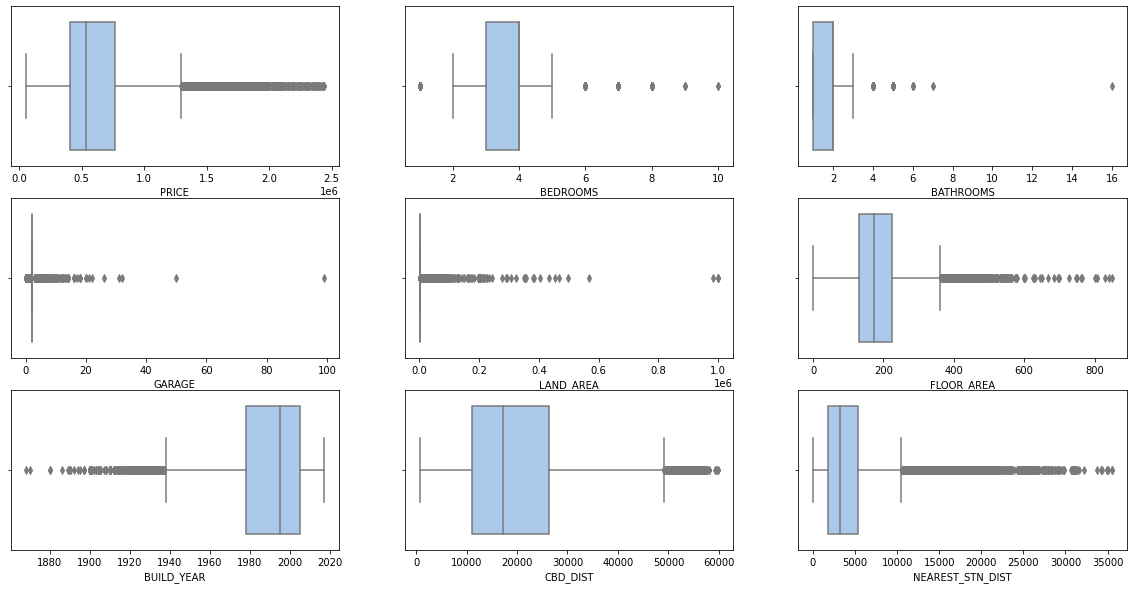

In [129]:
columnas = ['PRICE', 'BEDROOMS', 'BATHROOMS', 'GARAGE',
       'LAND_AREA', 'FLOOR_AREA', 'BUILD_YEAR', 'CBD_DIST',
       'NEAREST_STN_DIST']
  
fig, ax = plt.subplots(3,3, figsize=(20,10))
for i, col in enumerate(perthdf[columnas].columns):
    x = perthdf[col]
    plt.subplot(3,3, i+1)
    sns.boxplot(data=perthdf, x=col, palette='pastel', orient='h')
plt.show()

In [130]:
#Basado en las gráficas de los atributos más importantes a la hora de optar por una propiedad se concentrará este estudio en viviendas cuyo valor sea inferior o igual a AUD 1.5M, menor a 1500m2 de terreno y hasta 6 habitaciones, baños y estacionamientos.
perthdf = perthdf[(perthdf.GARAGE <= 6) & (perthdf.BEDROOMS <= 6 ) & (perthdf.BATHROOMS <= 6 ) & (perthdf.LAND_AREA <= 1500) & (perthdf.PRICE <= 1500000) & (perthdf.FLOOR_AREA <= 500)]
perthdf.head(5)

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK,MONTH_SOLD,YEAR_SOLD
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,09-2018,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN,9,2018
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019,6167,-32.193470,115.859553,ATWELL COLLEGE,5.524324,129.0,2,2019
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0,6,2015
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,07-2018,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN,7,2018
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,11-2016,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,NaN,11,2016


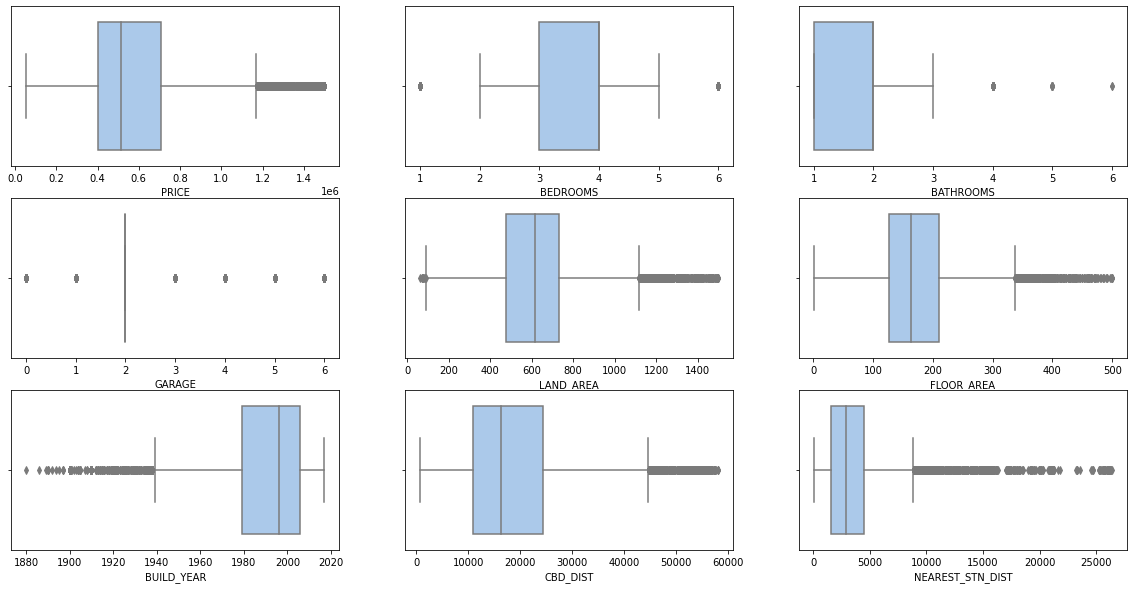

In [131]:
columnas = ['PRICE', 'BEDROOMS', 'BATHROOMS', 'GARAGE',
       'LAND_AREA', 'FLOOR_AREA', 'BUILD_YEAR', 'CBD_DIST',
       'NEAREST_STN_DIST']
  
fig, ax = plt.subplots(3,3, figsize=(20,10))
for i, col in enumerate(perthdf[columnas].columns):
    x = perthdf[col]
    plt.subplot(3,3, i+1)
    sns.boxplot(data=perthdf, x=col, palette='pastel', orient='h')
plt.show()

In [132]:
#Se calculan diferentes cuantiles para definir rangos de categorización
val10 = np.quantile(perthdf['PRICE'], .10)
val20 = np.quantile(perthdf['PRICE'], .20)
val25 = np.quantile(perthdf['PRICE'], .25)
val30 = np.quantile(perthdf['PRICE'], .30)
val33 = np.quantile(perthdf['PRICE'], .33)
val40 = np.quantile(perthdf['PRICE'], .40)
val50 = np.quantile(perthdf['PRICE'], .50)
val60 = np.quantile(perthdf['PRICE'], .60)
val66 = np.quantile(perthdf['PRICE'], .66)
val70 = np.quantile(perthdf['PRICE'], .70)
val75 = np.quantile(perthdf['PRICE'], .75)
val80 = np.quantile(perthdf['PRICE'], .80)
val85 = np.quantile(perthdf['PRICE'], .85)
val90 = np.quantile(perthdf['PRICE'], .90)
val95 = np.quantile(perthdf['PRICE'], .95)
print('10% - ', val10)
print('20% - ', val20)
print('25% - ', val25)
print('30% - ', val30)
print('33% - ', val33)
print('40% - ', val40)
print('50% - ', val50)
print('60% - ', val60)
print('66% - ', val66)
print('70% - ', val70)
print('75% - ', val75)
print('80% - ', val80)
print('85% - ', val85)
print('90% - ', val90)
print('95% - ', val95)

10% -  315000.0
20% -  375000.0
25% -  400000.0
30% -  420000.0
33% -  433000.0
40% -  465000.0
50% -  515000.0
60% -  570000.0
66% -  615000.0
70% -  650000.0
75% -  709500.0
80% -  775000.0
85% -  855000.0
90% -  965000.0
95% -  1190000.0


In [208]:
#Se definen 3 categorías para los rangos de precios, se toman como referencia los percentiles 40 y 80
bins = [-np.inf, val40, val80, +np.inf]
labels=['0','1','2']
perthdf['PriceCategory'] = pd.cut(perthdf['PRICE'], bins=bins, labels=labels)

In [209]:
perthdf.isnull().sum()

ADDRESS                0
SUBURB                 0
PRICE                  0
BEDROOMS               0
BATHROOMS              0
GARAGE                 0
LAND_AREA              0
FLOOR_AREA             0
BUILD_YEAR             0
CBD_DIST               0
NEAREST_STN            0
NEAREST_STN_DIST       0
DATE_SOLD              0
POSTCODE               0
LATITUDE               0
LONGITUDE              0
NEAREST_SCH            0
NEAREST_SCH_DIST       0
NEAREST_SCH_RANK    7848
MONTH_SOLD             0
YEAR_SOLD              0
PriceCategory          0
dtype: int64

In [134]:
def lin_reg(x, y):
    x_min_mx = x - np.mean(x)  # x minus mean(x)
    y_min_my = y - np.mean(y)  # y minus mean(y)
    beta_1 = np.sum(x_min_mx * y_min_my)  / np.sum(x_min_mx**2)
    beta_0 = np.mean(y) - (beta_1 * np.mean(x))
    y_hat = (beta_1 * x) + beta_0 #Aplicamos la forma de la regresión lineal
    return y_hat

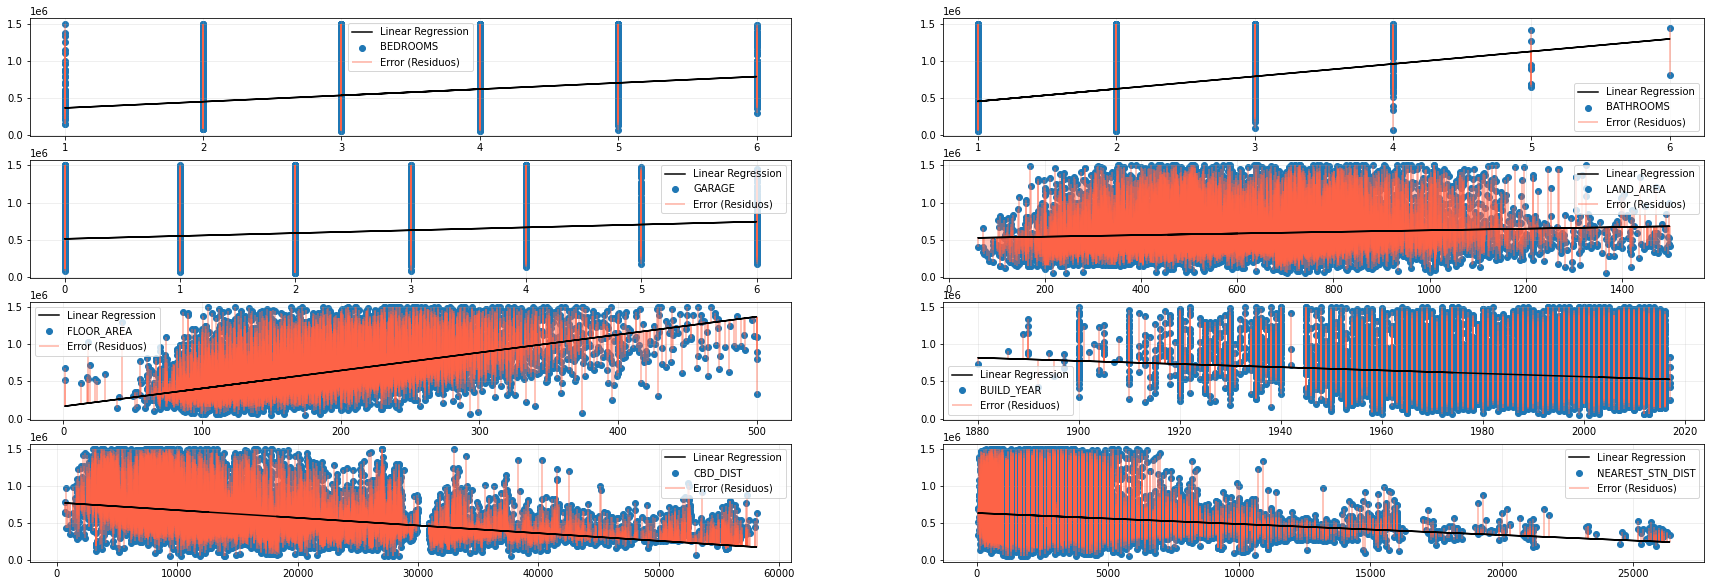

In [135]:
columnas = [ 'BEDROOMS', 'BATHROOMS', 'GARAGE',
       'LAND_AREA', 'FLOOR_AREA', 'BUILD_YEAR', 'CBD_DIST',
       'NEAREST_STN_DIST']
plt.subplots(4,2, figsize=(30,10))
y = perthdf['PRICE']
for i, col in enumerate(perthdf[columnas].columns):
    x = perthdf[col]
    plt.subplot(4,2, i+1)
    plt.scatter(x,y,label=col) # Vamos a gráficar nuestros datos originales
    plt.plot(x,lin_reg(x,y), color="black", label="Linear Regression") #Luego graficamos la curva ajustada 
    plt.vlines(x, y, lin_reg(x, y), color="tomato", label="Error (Residuos)", alpha=0.5) #Gráficamos los Errores en cada punto.
    plt.grid(b=True, which='major',axis='both', alpha=0.25)
    plt.legend()
plt.show()

In [136]:
# Importamos la regresión lineal de scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  

In [137]:
def Step_Forward_Feature_Selection(df, target, mae_th=0.05, verbose=True):
    columns_list = df.drop(target, axis=1).columns.to_list()
    y = df[[target]]
    selected_vars = [] #iniciliza variables seleccionadas
    mae_min = None # MAE minimo dentro de cada ciclo de regresiones con n variables
    mae_min_global = None # MAE minimo global

    while len(columns_list)>0:
        lr = LinearRegression() # instancia el regresor
        
        # recorre cada variable haciendo regresion
        for i, atrib in enumerate(columns_list): 
            X = df[selected_vars + [atrib]] # selecciona variables de acuerdo a variables seleccionadas + una variable de las restantes
            lr.fit(X,y)
            y_hat = lr.predict(X)
            mae = mean_absolute_error(y, y_hat)

            # Inicializa variables internas cuando MAE aún no es definida
            if mae_min==None:
                atrib_list = atrib # Candidato a variable seleccionada
                mae_min = mae # Candidato a MAE minimo
                pos=i # Posicion de la variable en el column_list actual
            # Si mae actual es menor a mae_min, actualiza variables internas
            elif mae<=mae_min:
                atrib_list = atrib
                mae_min = mae
                pos=i
        
        # Inicializa variables internas globales cuando MAE global aún no es definida
        if mae_min_global==None:
            if verbose:
                print(f"MAE inicial  :\t {mae_min:.2f} \t| variable: {atrib_list}")
            mae_min_global = mae_min # Candidato a MAE minimo global
            selected_vars.append(atrib_list) # Selecciona variable con menor MAE en el ciclo anterior
            columns_list.pop(pos) # Elimina variable con menor MAE en el ciclo anterior del listado para el ciclo siguiente
            mae_min = None
        
        # Si mae global disminuye de acuerdo a criterio, actualiza variables internas globales
        # El criterio es un porcentaje de disminución minimo (mae_th) de MAE global respecto al mejor MAE del ciclo
        elif (mae_min_global - mae_min) * 100 > mae_th * mae_min_global:
            if verbose:
                #print(f"Reducción MAE:\t {(mae_min_global - mae_min)*100/mae_min_global:.2f} % \t| variable: {atrib_list}")
                print(f"MAE actual   :\t {mae_min:.2f} \t| variable: {atrib_list}")
            mae_min_global = mae_min
            selected_vars.append(atrib_list)
            columns_list.pop(pos)
            mae_min = None
        
        # Si no cumple el criterio anterior, devuelve las variables seleccionadas
        else:
            return selected_vars

In [138]:
columnas = ['PRICE','BEDROOMS', 'BATHROOMS', 'GARAGE', 'LAND_AREA', 'FLOOR_AREA', 'BUILD_YEAR', 'CBD_DIST', 'NEAREST_STN_DIST','NEAREST_SCH_DIST']
col_sel = Step_Forward_Feature_Selection(df=perthdf[columnas], target='PRICE', mae_th=0.25)

MAE inicial  :	 168354.94 	| variable: FLOOR_AREA
MAE actual   :	 142330.13 	| variable: CBD_DIST
MAE actual   :	 134174.48 	| variable: BUILD_YEAR
MAE actual   :	 131620.08 	| variable: BATHROOMS
MAE actual   :	 130425.80 	| variable: BEDROOMS
MAE actual   :	 129775.98 	| variable: NEAREST_STN_DIST


In [158]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

In [188]:
perthdf1 = perthdf[['PRICE','BEDROOMS', 'BATHROOMS', 'GARAGE', 'LAND_AREA', 'FLOOR_AREA', 'BUILD_YEAR', 'CBD_DIST', 'NEAREST_STN_DIST','NEAREST_SCH_DIST']]

Inertial of clusters:  2418.293404224445


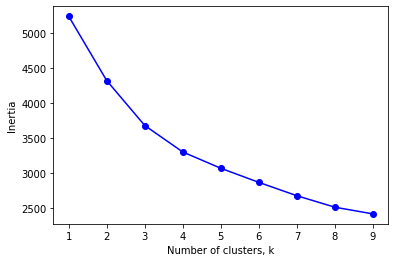

In [211]:
scaler = preprocessing.MinMaxScaler()

nuevodf = scaler.fit_transform(perthdf1)
ks = range(1,10)
inertias = []

for k in ks:
    k_mean = KMeans(n_clusters=k)
    k_mean.fit(nuevodf)
    inertias.append(k_mean.inertia_)

plt.plot(ks, inertias, '-o', c = 'b')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
print('Inertial of clusters: ', k_mean.inertia_)
plt.show()

In [213]:
nuevodf = pd.DataFrame(nuevodf)

In [217]:
nuevodf.isnull().sum()

0                   0
1                   0
2                   0
3                   0
4                   0
5                   0
6                   0
7                   0
8                   0
9                   0
PriceCategory    6261
dtype: int64

In [190]:
nuevodf = pd.DataFrame(perthdf1, columns=['PRICE','BEDROOMS', 'BATHROOMS', 'GARAGE', 'LAND_AREA', 'FLOOR_AREA', 'BUILD_YEAR', 'CBD_DIST', 'NEAREST_STN_DIST','NEAREST_SCH_DIST'])

In [216]:
nuevodf['PriceCategory'] = pd.to_numeric(perthdf['PriceCategory'])
#nuevodf.dropna()	

In [207]:
nuevodf.isnull().sum()

PRICE                  0
BEDROOMS               0
BATHROOMS              0
GARAGE                 0
LAND_AREA              0
FLOOR_AREA             0
BUILD_YEAR             0
CBD_DIST               0
NEAREST_STN_DIST       0
NEAREST_SCH_DIST       0
PriceCategory       6261
dtype: int64

In [203]:
x = nuevodf[['BEDROOMS', 'BATHROOMS', 'FLOOR_AREA', 'BUILD_YEAR', 'CBD_DIST', 'NEAREST_STN_DIST']]
y = nuevodf['PriceCategory']

In [204]:
#Se define el set de entrenamiento y el set de prueba que evaluará el modelo
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=260)

In [205]:
#Se prueba el modelo KMeans. El modelo se entrena y predice el valor de la categoría.
y_pred1 = KMeans(n_clusters=2,init='random',n_init=10, random_state=10, tol=0.01).fit(x_train,y_train)
y_pred1KM = y_pred1.predict(x_test)

In [206]:
#Se presentan las estadísticas de la exactitud de las predicciones del modelo KMeans
print('Accuracy Modelo 1: %0.5f' % (metrics.accuracy_score(y_test,y_pred1KM,normalize=True)*100),'%')

ValueError: ignored